# Visualization for Delegation Based Lock

In [2]:
@time using DataFrames, CSV

bench = @time CSV.read("output/output.csv", DataFrame)


  0.913998 seconds (339.96 k allocations: 20.309 MiB)


  2.832475 seconds (1.16 M allocations: 77.904 MiB, 2.04% gc time, 98.81% compilation time: 60% of which was recompilation)


Row,Id,CpuId,ThreadNum,CpuNum,LoopCount,NumAcquire,HoldTime,CombineTime,Locktype,WaiterType
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,String,String15?
1,0,0,2,32,245006190,295251,2965,17263526670,Flat Combining (SkipList),Spin Parker
2,1,1,2,32,728627221,292482,8786,18359567850,Flat Combining (SkipList),Spin Parker
3,0,0,2,32,249096605,299934,3012,10295373330,Flat Combining (SkipList),BlockParker
4,1,1,2,32,728796532,292491,8786,25776505380,Flat Combining (SkipList),BlockParker
5,0,0,2,32,247653043,298196,2994,13213125630,Flat Combining,Spin Parker
6,1,1,2,32,742602655,297980,8951,22815548250,Flat Combining,Spin Parker
7,0,0,2,32,196762552,237348,2384,14652746250,Flat Combining,BlockParker
8,1,1,2,32,591248061,237347,7130,14376227400,Flat Combining,BlockParker
9,0,0,2,32,249953402,301099,3024,15777137820,Flat Combining Fair,Spin Parker


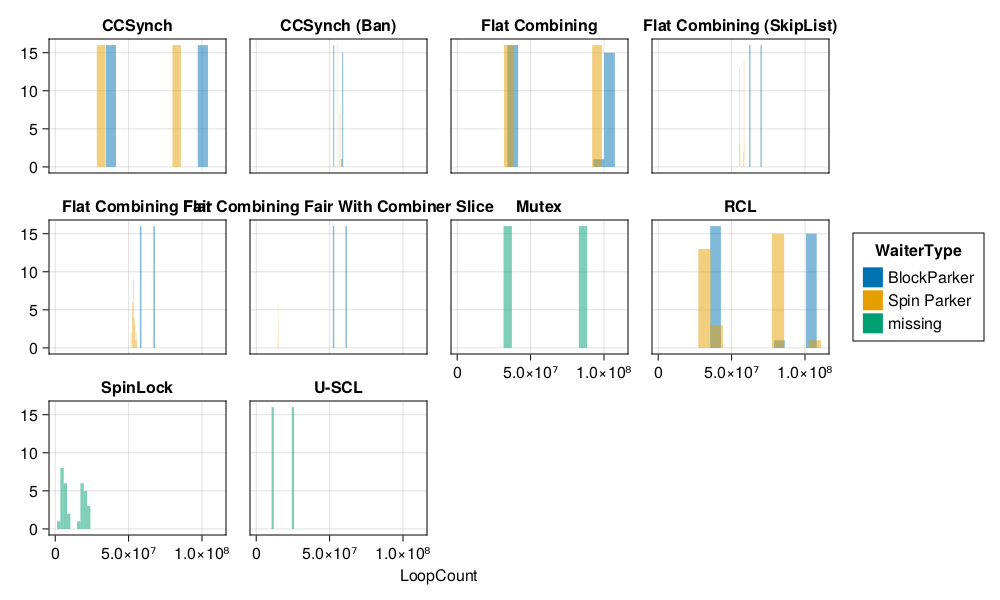

CairoMakie.Screen{IMAGE}


In [11]:
using AlgebraOfGraphics, CairoMakie
using AlgebraOfGraphics: density
using Tidier

CairoMakie.activate!(type = "svg")



loop_comparison = ((@chain bench begin
        Tidier.@filter(ThreadNum == 32)
end) |> data) * mapping(:LoopCount, layout = :Locktype, color = :WaiterType => nonnumeric) * (visual(Hist, bins=10, alpha=0.5))
    
# savefig(loop_comparison, "graphs/loop_comparison.svg")
fig = draw(loop_comparison, figure=(resolution=(1000,600),))

save("graphs/loop_comparison_per_thread_histogram.svg", fig)

display(fig)

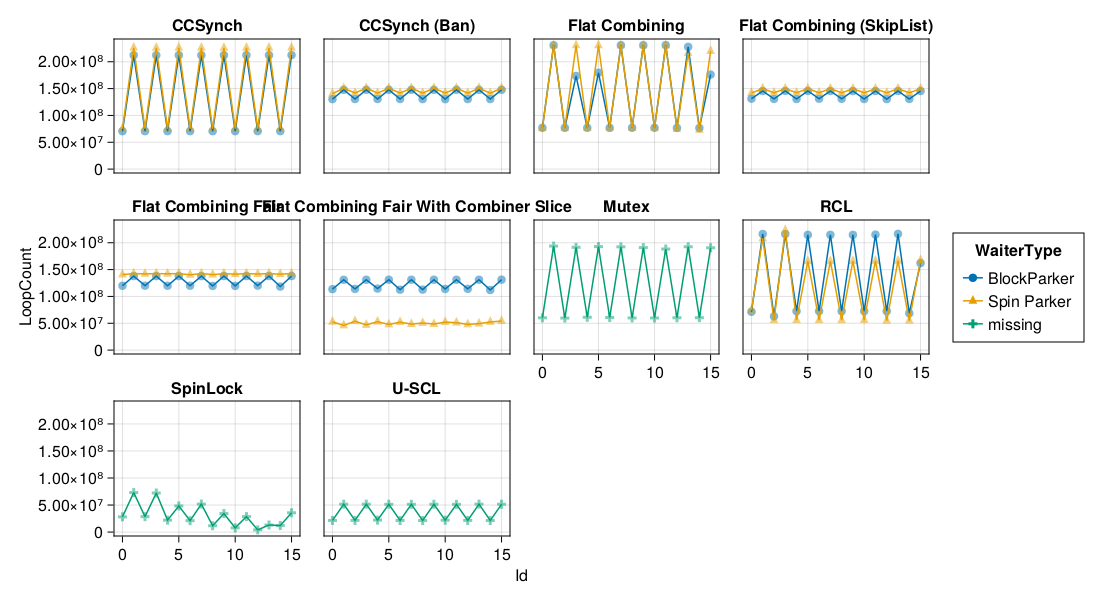

CairoMakie.Screen{IMAGE}


In [12]:
using AlgebraOfGraphics, CairoMakie
using AlgebraOfGraphics: density
using Tidier

CairoMakie.activate!(type = "svg")


loop_comparison = ((@chain bench begin
        Tidier.@filter(ThreadNum == 16)
end) |> data) * mapping(:Id, :LoopCount, layout = :Locktype, color = :WaiterType, marker = :WaiterType) * (visual(Scatter, alpha = 0.5) + visual(Lines))
    
# savefig(loop_comparison, "graphs/loop_comparison.svg")
fig = draw(loop_comparison, figure = (resolution = (1100,600),))

save("graphs/loop_comparison_per_thread.svg", fig)

display(fig)

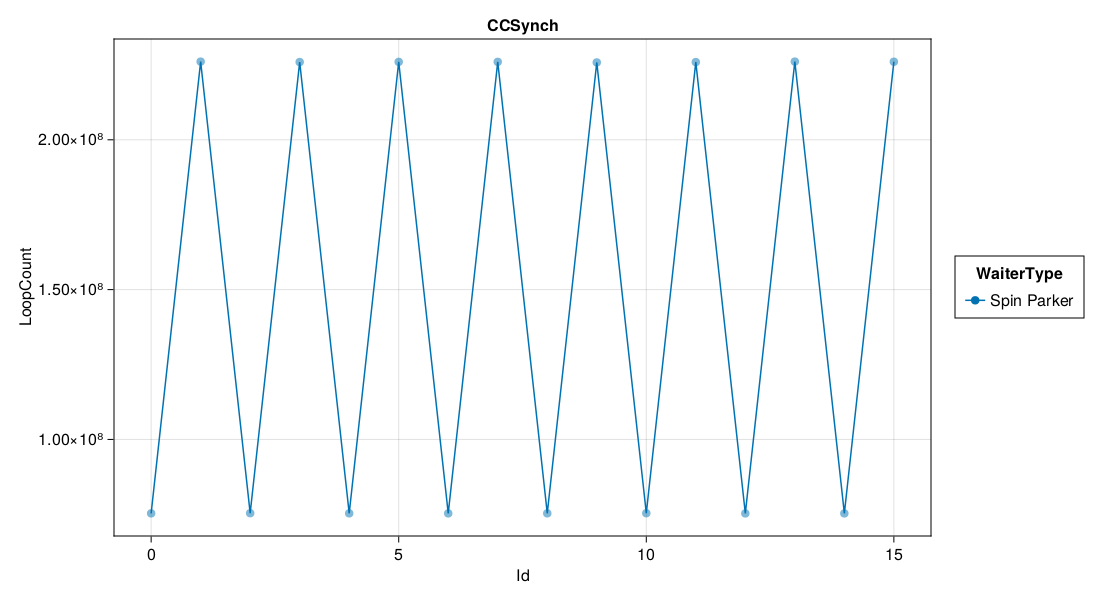

CairoMakie.Screen{IMAGE}


In [5]:
using AlgebraOfGraphics, CairoMakie
using AlgebraOfGraphics: density
using Tidier

CairoMakie.activate!(type = "svg")


loop_comparison = ((@chain bench begin
        Tidier.@filter(ThreadNum == 16 && Locktype == "CCSynch" && WaiterType == "Spin Parker")
end) |> data) * mapping(:Id, :LoopCount, layout = :Locktype, color = :WaiterType, marker = :WaiterType) * (visual(Scatter, alpha = 0.5) + visual(Lines))
    
# savefig(loop_comparison, "graphs/loop_comparison.svg")
fig = draw(loop_comparison, figure = (resolution = (1100,600),))

save("graphs/ccsynch_loop_comparison_per_thread.svg", fig)

display(fig)

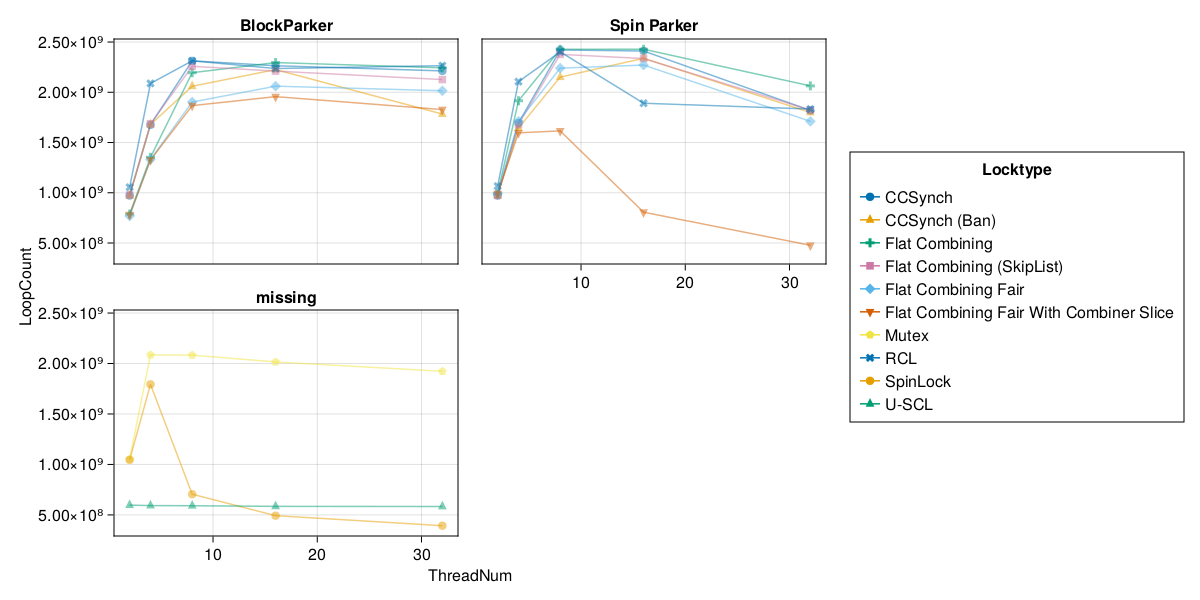

CairoMakie.Screen{IMAGE}


In [13]:
using Tidier
using AlgebraOfGraphics, CairoMakie

bench2 = @chain bench begin
    @group_by(Locktype, WaiterType, ThreadNum)
    @summarise(LoopCount = sum(LoopCount))
    @ungroup
end

plt = data(bench2) * mapping(:ThreadNum, :LoopCount, marker = :Locktype, color = :Locktype, layout = :WaiterType) * (visual(Lines, alpha=0.5) + visual(Scatter, alpha=0.5))

fig = draw(plt, figure = (resolution=(1200,600),))

save("graphs/loop_comparison_together.svg", fig)

display(fig)

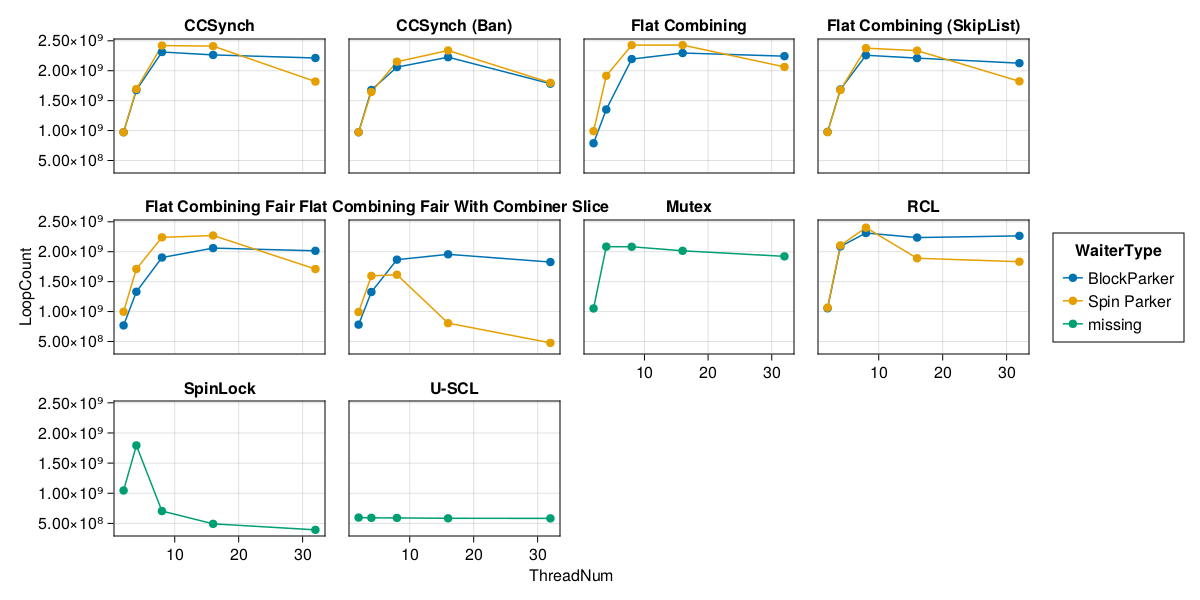

CairoMakie.Screen{IMAGE}


In [14]:
using Tidier
using AlgebraOfGraphics, CairoMakie

bench2 = @chain bench begin
    @group_by(Locktype, WaiterType, ThreadNum)
    @summarise(LoopCount = sum(LoopCount))
    @ungroup
end

plt = data(bench2) * mapping(:ThreadNum, :LoopCount, layout = :Locktype, color = :WaiterType) * (visual(Lines) + visual(Scatter))

fig = draw(plt, figure = (resolution=(1200,600),))

save("graphs/loop_comparison_split.svg", fig)

display(fig)

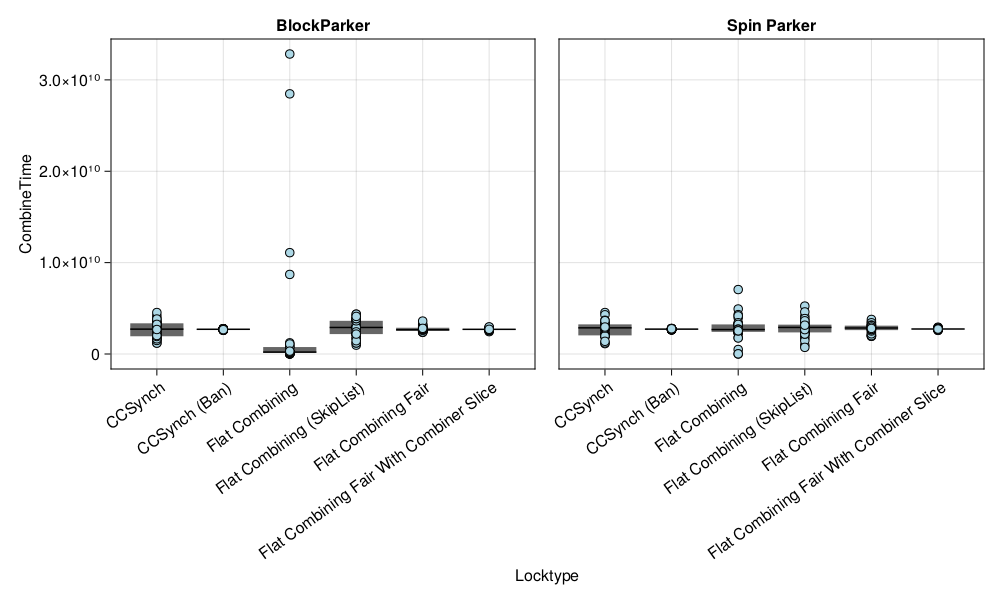

CairoMakie.Screen{IMAGE}


In [7]:
using DataFrames, Tidier, AlgebraOfGraphics, CairoMakie

bench_32thread = @chain dropmissing(bench) begin
    Tidier.@filter(ThreadNum == 32)
end

plt = data(bench_32thread) * mapping(:Locktype, :CombineTime, layout = :WaiterType) * (visual(BoxPlot) + (visual(Scatter, color = "lightblue", strokewidth = 1 )))


fig = draw(plt, axis=(xticklabelrotation=pi/5,), figure = (resolution=(1000,600),))

save("graphs/combining_time_box_plot.svg", fig)

display(fig)